# L02: Solar IV Curves

## Pre-lab

Theoretical and experimental solar I-V and P-V curves.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

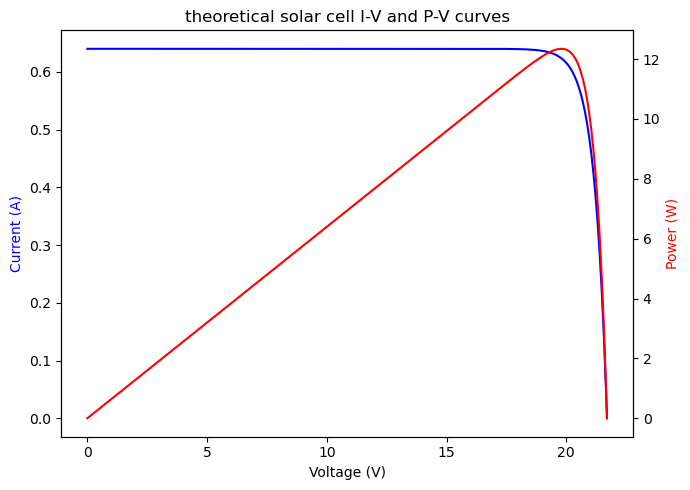

In [3]:
Isc = 0.64          # short-circuit current A
Voc = 21.7          # open-circuit voltage V
Vt = 0.026          # thermal voltage V
n = 20              # scale to prevent overflow exception?


I0 = Isc / (np.exp(Voc / (n*Vt)) - 1)

V = np.linspace(0, Voc, 500)

I = Isc - I0 * (np.exp(V / (n*Vt)) - 1)

# pv curve
P = V * I

fig, ax1 = plt.subplots(figsize=(7,5))

ax1.plot(V, I, label="I–V", color="blue")
ax1.set_xlabel("Voltage (V)")
ax1.set_ylabel("Current (A)", color="blue")

ax2 = ax1.twinx()
ax2.plot(V, P, label="P–V", color="red")
ax2.set_ylabel("Power (W)", color="red")

plt.title("theoretical solar cell I-V and P-V curves")
fig.tight_layout()
plt.show()


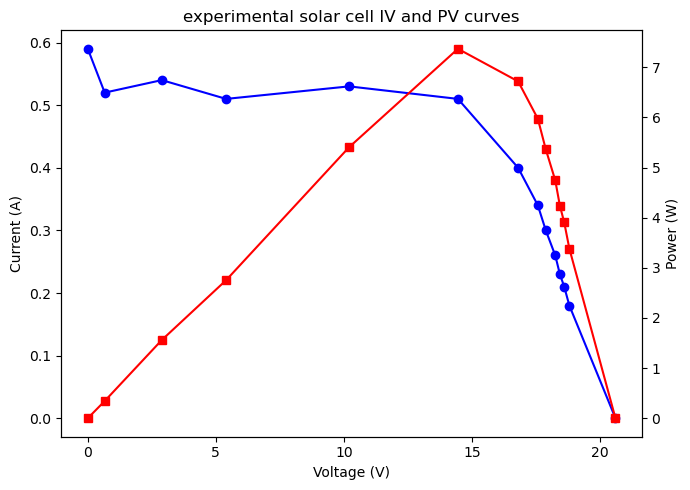

In [50]:
# read into pd dataframe
df = pd.read_csv("./sunny-data.csv")

# Extract data
Vexp = df["Voltage"]
Iexp = df["Current"]

Pexp = Vexp * Iexp

# plot I–V and P–V on the same graph
fig, ax1 = plt.subplots(figsize=(7,5))

# experimental curves
# IV
ax1.plot(Vexp, Iexp, 'o-', color="blue", label="I–V curve")
ax1.set_xlabel("Voltage (V)")
ax1.set_ylabel("Current (A)")

# PV
ax2 = ax1.twinx()
ax2.plot(Vexp, Pexp, 's-', color="red", label="P–V curve")
ax2.set_ylabel("Power (W)")

plt.title("experimental solar cell IV and PV curves")
fig.tight_layout()
plt.show()

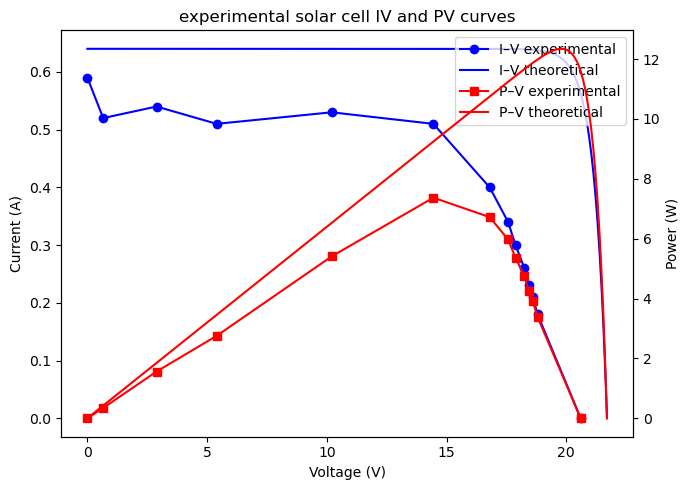

In [48]:
# plot exp and theo on the same graph
fig, ax1 = plt.subplots(figsize=(7,5))

# experimental curves
# IV
ax1.plot(Vexp, Iexp, 'o-', color="blue", label="I–V experimental")
ax1.plot(V, I, label="I–V theoretical", color="blue")
ax1.set_xlabel("Voltage (V)")
ax1.set_ylabel("Current (A)")

# PV
ax2 = ax1.twinx()
ax2.plot(Vexp, Pexp, 's-', color="red", label="P–V experimental")
ax2.plot(V, P, label="P–V theoretical", color="red")
ax2.set_ylabel("Power (W)")

# legend
lines = ax1.get_lines() + ax2.get_lines()  # concatenate lists
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right")

plt.title("experimental solar cell IV and PV curves")
fig.tight_layout()
plt.show()

## Post Lab

The shape of our I-V curve (fig XX) generally follows the trend of the standard curve. In our I-V curve, the current seems to increase slightly as voltage increases, and we believe that is caused by changes in cloud cover during data collection. As clouds moved, more direct sunlight reached the panel.  

Our experimental values for Pmax, Isc, and Voc were 4.02 W, .18 A, and 20.3 V respectively. The specifications of a typical 10W-rated panel for Pmax, Isc, and Voc are 10 W, ~.6A, ~21 V. The measured Isc was much lower than expected because it was overcast while we were gathering data. The measured Voc was close to that of the panel.

<!-- 6.	From the data, can you estimate/approximate/determine the parameters for the saturation current, I0, and the thermal voltage, Vth in the Schokley diode equation? How or why not?  -->

Our relative resistance value errors (figure XX) were fairly low. We configured the switches on the resistance box such that the measured resistance was as close as possible to the target resistance. The errors did not appear to have a noticeable effect on the experimental data.

If the 10W-rated panels are 15 years old and the panel rating is expected to degrade .5% per year, the panels should be producing at a 7.5% loss, equivalent to 9.25 W. Our measured power output was 4.02 W which is far below that. However, we are unable to make conclusions about panel aging because we believe that overcast meteorological conditions were the primary contributor to the panel inefficiency.

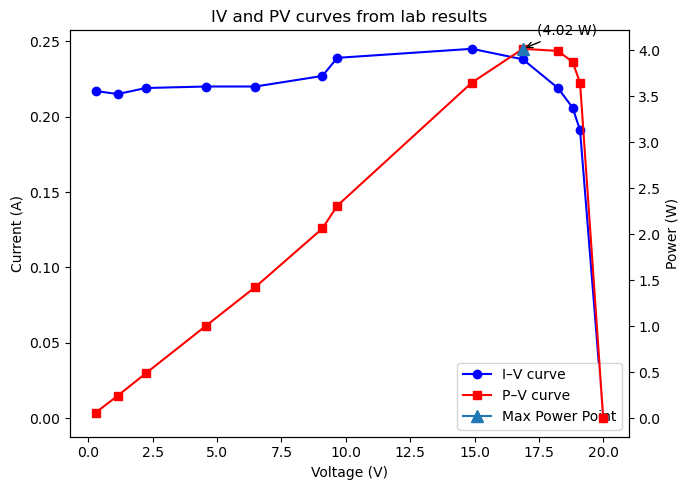

In [15]:
# read into pd dataframe
df = pd.read_csv("./data1.csv")

# Extract data
Vexp = df["voltage"]
Iexp = df["current"]

Pexp = Vexp * Iexp

# find max
imax = Pexp.idxmax()
VmaxP = Vexp.iloc[imax]
Pmax = Pexp.iloc[imax]

# plot I–V and P–V on the same graph
fig, ax1 = plt.subplots(figsize=(7,5))

# experimental curves
# IV
ax1.plot(Vexp, Iexp, 'o-', color="blue", label="I–V curve")
ax1.set_xlabel("Voltage (V)")
ax1.set_ylabel("Current (A)")

# PV
ax2 = ax1.twinx()
ax2.plot(Vexp, Pexp, 's-', color="red", label="P–V curve")
ax2.set_ylabel("Power (W)")

# plot mpp
ax2.plot(VmaxP, Pmax, marker="^", markersize=8, label="Max Power Point")
ax2.annotate(f"({Pmax:.2f} W)",
             (VmaxP, Pmax),
             textcoords="offset points", xytext=(10,10),
             arrowprops=dict(arrowstyle="->"))

plt.title("IV and PV curves from lab results")
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="lower right")
fig.tight_layout()
plt.show()

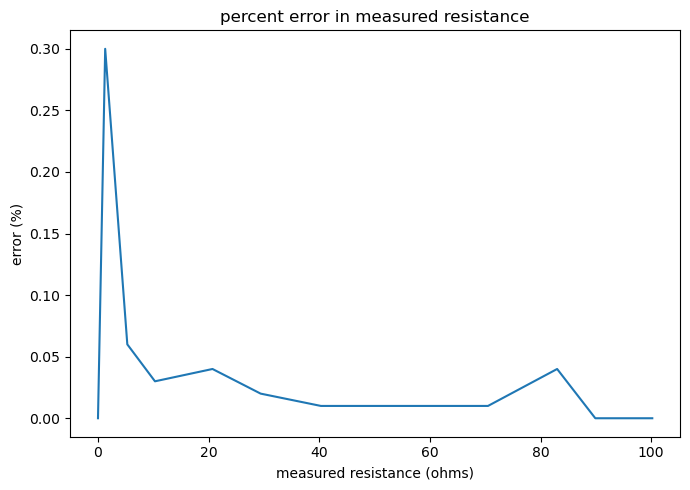

In [8]:
# Plot the relative resistance value errors (%) vs.R. What effects do these errors 
# have on your experiments? 

df = pd.read_csv("./data1.csv")
errors = df["error"]
res = df["actual r"]

fig, ax1 = plt.subplots(figsize=(7,5))

ax1.plot(res, errors)
ax1.set_xlabel("measured resistance (ohms)")
ax1.set_ylabel("error (%)")

plt.title("percent error in measured resistance")
fig.tight_layout()
plt.show()
